In [1]:
import pandas as pd
# Đọc file CSV
df = pd.read_csv('merged_output.csv')
# Lấy số lượng đặc trưng (số cột trừ cột Label)
num_features = len(df.columns) - 1
# Lấy tổng số mẫu
num_samples = len(df)
# Lấy số lượng nhãn độc nhất và số lượng mẫu mỗi nhãn
label_counts = df['Label'].value_counts()
num_unique_labels = len(label_counts)
# In kết quả
print(f"Số lượng đặc trưng: {num_features}")
print(f"Tổng số mẫu: {num_samples}")
print(f"Số lượng nhãn độc nhất: {num_unique_labels}")
print("\nSố lượng mẫu mỗi nhãn:")
for label, count in label_counts.items():
    print(f"Nhãn {label}: {count} mẫu")

display(df)

Số lượng đặc trưng: 77
Tổng số mẫu: 6546850
Số lượng nhãn độc nhất: 15

Số lượng mẫu mỗi nhãn:
Nhãn Benign: 5216326 mẫu
Nhãn DDoS attacks-LOIC-HTTP: 575364 mẫu
Nhãn DDOS attack-HOIC: 198861 mẫu
Nhãn DoS attacks-Hulk: 145199 mẫu
Nhãn Bot: 144535 mẫu
Nhãn Infilteration: 118483 mẫu
Nhãn SSH-Bruteforce: 94048 mẫu
Nhãn DoS attacks-GoldenEye: 41406 mẫu
Nhãn DoS attacks-Slowloris: 9908 mẫu
Nhãn DDOS attack-LOIC-UDP: 1730 mẫu
Nhãn Brute Force -Web: 568 mẫu
Nhãn Brute Force -XSS: 229 mẫu
Nhãn SQL Injection: 85 mẫu
Nhãn DoS attacks-SlowHTTPTest: 55 mẫu
Nhãn FTP-BruteForce: 53 mẫu


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,141385,9,7,553,3773.0,202,0,61.444443,87.534440,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,6,281,2,1,38,0.0,38,0,19.000000,26.870058,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,6,279824,11,15,1086,10527.0,385,0,98.727270,129.392500,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,6,132,2,0,0,0.0,0,0,0.000000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,6,274016,9,13,1285,6141.0,517,0,142.777770,183.887730,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6546845,6,62590,5,6,1590,196.0,1244,0,318.000000,538.895140,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
6546846,6,65192,6,5,1590,196.0,1244,0,265.000000,499.179720,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
6546847,6,64474,6,5,1590,196.0,1244,0,265.000000,499.179720,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
6546848,6,61681,5,6,1590,196.0,1244,0,318.000000,538.895140,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


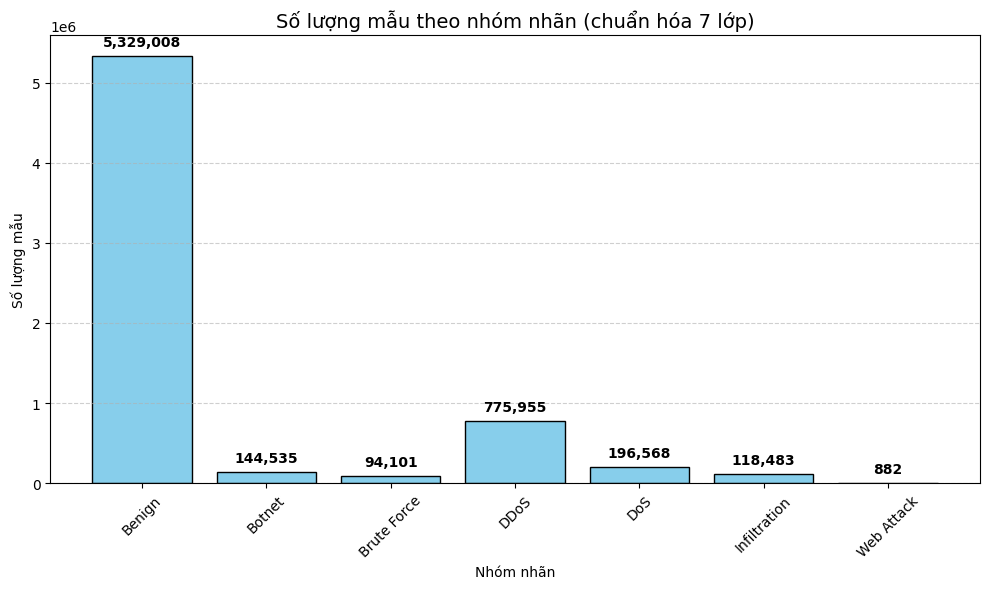

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file CSV
df = pd.read_csv('merged_output.csv')

# Hàm gom nhóm nhãn
def map_label_to_group(label):
    label = str(label).lower().strip()
    if 'benign' in label:
        return 'Benign'
    elif any(x in label for x in ['ddos', 'hoic', 'loic']):
        return 'DDoS'
    elif any(x in label for x in ['dos', 'hulk', 'goldeneye', 'slowloris', 'slowhttptest']):
        return 'DoS'
    elif any(x in label for x in ['ssh-bruteforce', 'ftp-brute']):
        return 'Brute Force'
    elif any(x in label for x in ['brute force -web', 'brute force -xss', 'sql']):
        return 'Web Attack'
    elif 'bot' in label:
        return 'Botnet'
    elif 'infilteration' in label:
        return 'Infiltration'
    else:
        return 'Unknown'

# Gán nhóm
df['Group'] = df['Label'].apply(map_label_to_group)

# Thống kê số lượng mỗi nhóm
group_counts = df['Group'].value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(group_counts.index, group_counts.values, color='skyblue', edgecolor='black')

# Thêm số lượng trên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,}',  # Thêm dấu phẩy phân cách
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Dịch lên trên
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10, fontweight='bold')

plt.title('Số lượng mẫu theo nhóm nhãn (chuẩn hóa 7 lớp)', fontsize=14)
plt.xlabel('Nhóm nhãn')
plt.ylabel('Số lượng mẫu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()